In [5]:
import pandas as pd
from fbprophet import Prophet

In [7]:
purchases = pd.read_csv('./data/purchases.csv')
print(purchases.tail())
purchases['cumsum'] = purchases['amount'].cumsum()
print(purchases.tail())


          date  amount
78  2017-12-24   62.53
79  2017-12-27   43.99
80  2017-12-28   21.99
81  2018-01-07   17.99
82  2018-01-31  158.19
          date  amount   cumsum
78  2017-12-24   62.53  4906.19
79  2017-12-27   43.99  4950.18
80  2017-12-28   21.99  4972.17
81  2018-01-07   17.99  4990.16
82  2018-01-31  158.19  5148.35


In [8]:
purchases = purchases[['date', 'cumsum']]
purchases.columns = ['ds', 'y']
print(purchases.head())

           ds       y
0  2012-07-25   82.55
1  2012-12-10  143.56
2  2013-02-19  155.10
3  2013-02-24  221.77
4  2013-04-20  229.76


In [9]:
m = Prophet(daily_seasonality=False)
m.fit(purchases)

/Users/ram/miniconda3/envs/ml-dev/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [10]:
future = m.make_future_dataframe(periods=365)
print(future.tail())

            ds
443 2019-01-27
444 2019-01-28
445 2019-01-29
446 2019-01-30
447 2019-01-31


In [11]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
443,2019-01-27,7914.330291,7684.600876,8139.364868
444,2019-01-28,7891.583392,7658.340447,8126.368269
445,2019-01-29,7875.415396,7649.969302,8096.358856
446,2019-01-30,7924.375719,7682.160568,8164.137291
447,2019-01-31,7985.795633,7753.820164,8221.127464


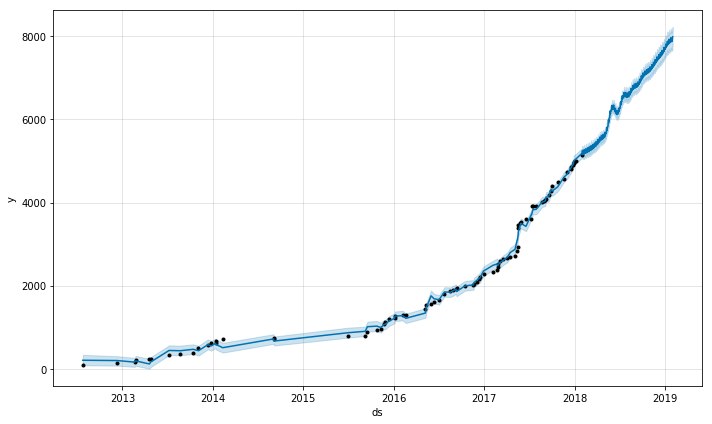

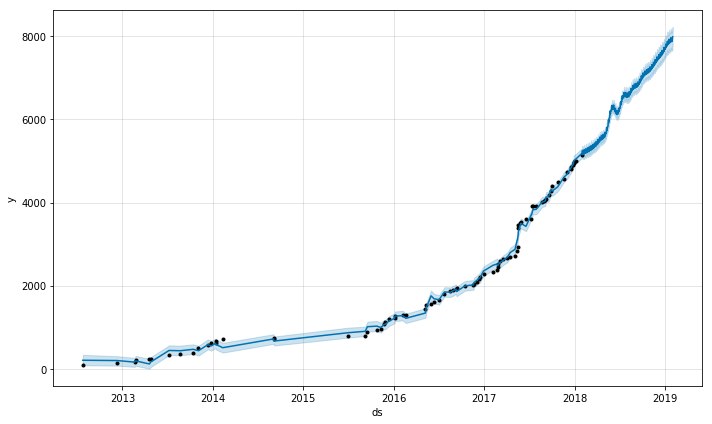

In [12]:
%matplotlib inline
m.plot(forecast)

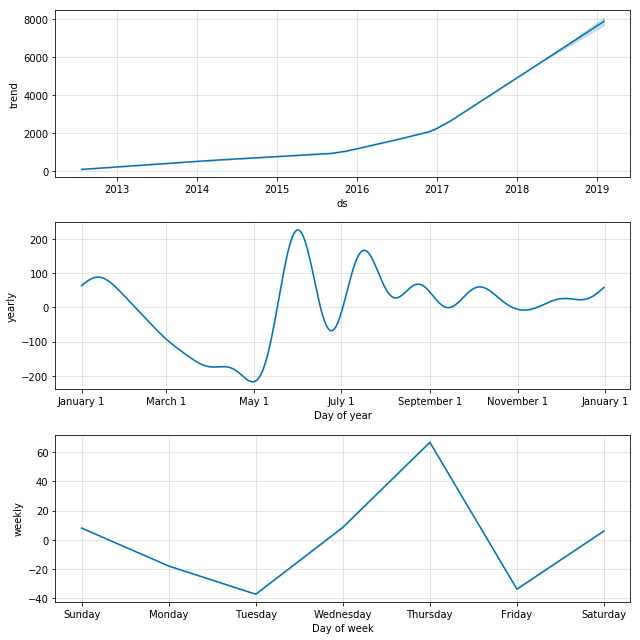

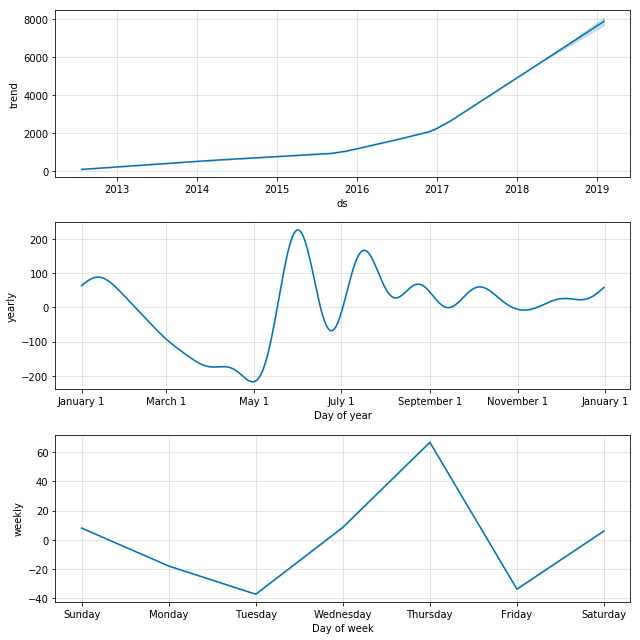

In [13]:
m.plot_components(forecast)